# Attempting some basic aperture photometry (yeet)

Based on method used in previous source detection test

First up, dependencies:

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.stats import sigma_clipped_stats
from photutils import DAOStarFinder
from photutils import CircularAperture, CircularAnnulus
from photutils import aperture_photometry
from matplotlib.colors import LogNorm
#from astropy.visualization import SqrtStretch
#from astropy.visualization.mpl_normalize import ImageNormalize

Importing .fits file and extracting the ~ *data* ~:

In [34]:
image_file = 'example_data/PAL5_3p6um.fits'
image_data = fits.getdata(image_file, ext=0)
#print(image_data.shape)

Locating the objects in the image using DAOStarFinder:

In [35]:
mean, median, std = sigma_clipped_stats(image_data, sigma=3.)
daofind = DAOStarFinder(threshold=15.*std, fwhm=1.)
sources = daofind(image_data-median)   # accounting for median bkgd level
#sources = daofind(image_data)
for col in sources.colnames:           # don't need if not printing?
    sources[col].info.format = '%.8g'
#print(sources)

Adding the centroid positions of the objects to an array and fitting circular apertures around them:

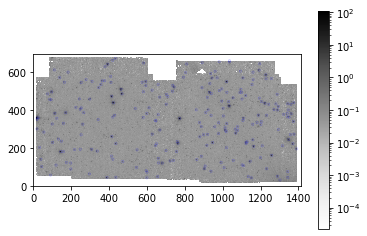

In [40]:
pos = np.transpose((sources['xcentroid'], sources['ycentroid']))
apertures = CircularAperture(pos, r=6.)
norm = LogNorm()
plt.imshow(image_data, cmap='Greys', origin='lower', norm=norm, interpolation='nearest')
plt.colorbar()
apertures.plot(color='blue', lw=.5, alpha=0.3)

plt.savefig('ap_photom_sources_test04.png', dpi=500)

Performing some basic aperture photometry, summing the pixel brightness values (fluxes?) inside each aperture:

In [37]:
phot_table = aperture_photometry(image_data, apertures)
phot_table['aperture_sum'].info.format = '%.8g'
print(phot_table)

 id      xcenter            ycenter       aperture_sum
           pix                pix                     
--- ------------------ ------------------ ------------
  1  1302.527358569437 31.643990476828456    12.954004
  2 1151.3914527817194   42.9520802608662     23.86755
  3   599.364053360778  42.65452201493125    7.7976643
  4  388.7200455498556  45.30305759675235    66.847839
  5 435.70219800546386  45.93372854665834    18.791731
  6   1343.98750733798  45.45498135690846    27.934003
  7  656.3522083478791 49.331315898852864    12.225826
  8 1135.1498001235125 49.438357505181955    10.859164
  9 1289.1213344694168  51.21326926366426    55.495936
 10  90.23531529329756 57.316591133681655     7.643149
...                ...                ...          ...
227 393.08603756655833  643.6101407775639    215.21107
228  809.6842674476524   644.349136452788    7.9709513
229  1195.400399954479  645.2891436433639    7.2955894
230  582.2367182618995  649.4612319461812    29.343966
231  891.1